In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

dfr = pd.read_csv(r'winequality-red.csv', sep=';')
dfw = pd.read_csv(r'winequality-white.csv', sep=';')

# 颜色
color = sns.color_palette()
# 数据print精度
pd.set_option('precision', 3)
# 显示完整的列
pd.set_option('display.max_columns', None)
# 显示完整的行
pd.set_option('display.max_rows', None)
# 设置字体
my_font = font_manager.FontProperties(fname="苹方字体.ttf")

In [7]:
# 输入变量主成分分析
"""
参数：
    - XMat：传入的是一个numpy的矩阵格式，行表示样本数，列表示特征
    - k：表示取前k个特征值对应的特征向量
函数解释：
    - pca_mat()：获取参与运算的多维数组
    - pca_eig()：返回满足要求的前k个特征值和特征向量
    - pca_coe()：返回主成分系数
    - pca()：返回每个样本的主成分得分
    - pca_draw()：返回前两个主成分得分的散点图
"""


def pca_mat(x):
    temp = x.drop(['quality'], axis=1)  # 获取去除评分项的数据表
    XMat = np.array(temp)  # dataframe格式转为多维数组
    average = np.mean(XMat, axis=0)  # axis=0表示按照列来求均值
    standard = np.std(XMat, axis=0)  # 求每列标准差
    data_adjust = (XMat - average) / standard  # 中心标准化
    return data_adjust


def pca_eig(data_adjust):
    covmat = np.cov(data_adjust, rowvar=0)  # 计算协方差矩阵
    eigVals, eigVects = np.linalg.eig(covmat)  # 求解协方差矩阵的特征值和特征向量
    eigValInd = np.argsort(-eigVals)  # 按照eigVals进行从大到小排序（给出序号，不修改原特征值列表）
    """确定前k的主成分，使选取的主成分贡献90%以上的方差"""
    val_sum = 0
    val_total = eigVals.sum()
    for k in eigValInd:
        val_sum += eigVals[k]
        if val_sum / val_total < 0.90:
            continue
        else:
            break
    """分割线"""
    x = int(np.argwhere(eigValInd == k) + 1)  # 定位k所在位置，结果加1
    eigValInd = eigValInd[:x:1]  # 截取前k个特征值的序号
    """取前k特征值"""
    list = []
    for i in eigValInd:
        list.append(eigVals[i])
    redEigVals = np.array(list)
    """对应前k的特征向量"""
    redEigVects = []
    for i in eigValInd:
        redEigVects.append(eigVects[i])
    redEigVects = np.array(redEigVects).T
    return redEigVals, redEigVects, eigVals, eigVects


def pca_coe(data_adjust):
    return pca_eig(data_adjust)[1] / (pca_eig(data_adjust)[0] ** 0.5)


def pca(data_adjust):
    lowDDataMat = np.matrix(data_adjust) * pca_eig(data_adjust)[1]
    return lowDDataMat


def pca_draw(data_adjust):
    df = pd.DataFrame(pca(data_adjust))
    plt.scatter(x=df[0], y=df[1])
    if data_adjust.sum() - pca_mat(dfr).sum() == 0:
        i = '红葡萄酒'
    else:
        i = '白葡萄酒'
    plt.title(f'{i}' + '主成分得分--散点图', fontproperties=my_font)
    plt.xlabel('第一主成分', fontsize=12, fontproperties=my_font)
    plt.ylabel('第二主成分', fontsize=12, fontproperties=my_font)
    plt.show()

In [8]:
"""红、白葡萄酒初始分析数据"""
pr = pca_mat(dfr)
pw = pca_mat(dfw)

In [9]:
# 主成分分析
pca_eig(pr)[2]

array([ 3.88070825e+00,  1.93782510e+00,  1.59121221e+00,  1.26119209e+00,
        9.62744293e-01, -2.51040967e-16,  7.44436784e-02,  6.93452298e-01,
        6.36767526e-01,  1.86870832e-01,  4.31335890e-01,  3.50957225e-01])

In [10]:
pca_eig(pw)[2]

array([3.36570674e+00, 2.22131017e+00, 1.64244188e-15, 2.09602992e-02,
       2.92254807e-01, 4.27978385e-01, 1.22380645e+00, 6.87381846e-01,
       7.54085539e-01, 1.05187249e+00, 9.40654582e-01, 1.01643918e+00])

In [11]:
pca_eig(pr)[0]

array([3.88070825, 1.9378251 , 1.59121221, 1.26119209, 0.96274429,
       0.6934523 , 0.63676753])

In [12]:
pca_eig(pw)[0]

array([3.36570674, 2.22131017, 1.22380645, 1.05187249, 1.01643918,
       0.94065458, 0.75408554, 0.68738185])

In [13]:
"""主成分系数 解释为第K个主成分表示为11个输入变量的线性组合。可见很难清晰的描述除各主成分代表的含义。"""
pd.DataFrame(pca_coe(pr))

,0,1,2,3,4,5,6
0,0.237,0.341,-0.143,3.564e-01,1.138e-01,-1.529e-02,4.582e-01
1,0.033,0.063,-0.181,9.074e-02,-2.901e-01,-6.960e-01,-3.071e-01
2,-0.073,-0.064,-0.397,2.689e-01,8.429e-02,3.217e-01,-3.852e-01
3,-0.084,-0.121,0.055,-3.598e-02,-3.280e-01,-1.371e-01,-8.778e-02
4,0.024,0.048,-0.152,3.541e-02,-7.740e-01,2.805e-01,-2.304e-01
5,0.354,-0.512,-0.058,5.237e-17,-1.054e-15,-6.359e-16,1.934e-15
6,0.172,0.240,-0.021,-4.069e-02,2.222e-01,7.922e-02,-8.139e-01
7,-0.130,-0.133,-0.503,7.406e-02,1.672e-01,-1.892e-01,3.445e-01
8,0.080,0.101,0.103,-1.469e-01,-2.748e-01,-2.693e-02,4.199e-01
9,-0.069,-0.125,0.315,5.634e-01,5.834e-02,-4.785e-01,-1.987e-01


In [14]:
pd.DataFrame(pca_coe(pw))

,0,1,2,3,4,5,6,7
0,0.146,0.180,2.273e-01,-1.818e-01,-3.996e-01,3.107e-02,5.609e-01,4.426e-01
1,-0.296,-0.365,2.583e-01,3.489e-01,-1.795e-01,1.070e-01,1.652e-01,2.996e-01
2,0.385,-0.472,2.636e-16,-1.253e-15,3.440e-15,-5.393e-16,8.629e-15,-6.964e-16
3,0.047,0.057,-2.866e-02,1.378e-01,-3.580e-01,4.351e-02,-8.817e-01,4.378e-02
4,0.032,0.022,5.109e-01,8.882e-02,-2.968e-01,6.393e-02,6.267e-02,-8.589e-01
5,-0.056,-0.082,-1.672e-01,-2.072e-01,-6.191e-01,-1.350e-02,-7.852e-02,2.765e-01
6,0.017,0.065,2.713e-01,1.738e-01,1.140e-01,4.838e-01,-1.517e-01,1.824e-01
7,-0.101,-0.120,8.084e-02,-7.669e-01,7.385e-02,4.830e-01,-1.210e-01,-1.260e-01
8,0.101,0.153,1.513e-01,3.232e-02,-2.141e-01,6.595e-03,-8.335e-02,1.376e-01
9,0.110,0.085,4.904e-02,2.219e-01,1.912e-01,5.831e-01,-3.854e-02,3.217e-01


In [15]:
"""主成分得分 解释为每个样本点在主成分上投影的坐标。"""
pd.DataFrame(pca(pr))

,0,1,2,3,4,5,6
0,-0.339,-2.650e-02,3.575e-01,5.717e-01,6.405e-01,-0.466,1.077e-01
1,0.320,1.881e-01,-1.834e+00,-1.662e-01,9.628e-01,0.788,-7.978e-01
2,0.010,-2.486e-02,-9.822e-01,-1.177e-01,6.700e-01,0.366,-7.253e-02
3,0.844,1.244e+00,-4.479e-01,-5.204e-01,-7.743e-01,-1.675,1.050e+00
4,-0.339,-2.650e-02,3.575e-01,5.717e-01,6.405e-01,-0.466,1.077e-01
5,-0.318,2.267e-02,3.682e-01,4.984e-01,7.449e-01,-0.558,1.068e-01
6,-0.235,3.767e-01,-5.439e-01,1.183e-03,7.805e-01,-0.445,3.530e-01
7,-0.462,1.719e-01,4.455e-01,5.833e-01,1.263e+00,0.102,-4.111e-01
8,-0.116,2.679e-01,4.878e-01,-7.931e-02,4.265e-01,-0.255,2.568e-01
9,-0.870,-2.561e-01,-1.015e+00,-2.446e-01,-1.626e+00,0.501,-1.312e-01


In [16]:
pd.DataFrame(pca(pw))

,0,1,2,3,4,5,6,7
0,2.037e-01,5.051e-01,2.538e+00,-3.760e-01,-1.373e+00,-1.046e-01,-5.554e-02,-1.864e+00
1,4.462e-01,2.904e-02,-9.807e-01,-2.222e-01,7.227e-01,-6.068e-01,-3.361e-01,4.633e-01
2,-6.250e-03,-6.937e-02,5.925e-01,1.209e+00,-1.313e+00,-2.769e-02,7.557e-01,1.034e+00
3,-5.599e-01,1.946e-01,5.045e-01,-6.035e-01,-6.420e-01,1.096e+00,3.261e-01,-6.619e-02
4,-5.599e-01,1.946e-01,5.045e-01,-6.035e-01,-6.420e-01,1.096e+00,3.261e-01,-6.619e-02
5,-6.250e-03,-6.937e-02,5.925e-01,1.209e+00,-1.313e+00,-2.769e-02,7.557e-01,1.034e+00
6,4.860e-01,-9.297e-02,-1.738e-01,-3.517e-01,9.576e-01,-4.883e-01,7.396e-01,-5.684e-01
7,2.037e-01,5.051e-01,2.538e+00,-3.760e-01,-1.373e+00,-1.046e-01,-5.554e-02,-1.864e+00
8,4.462e-01,2.904e-02,-9.807e-01,-2.222e-01,7.227e-01,-6.068e-01,-3.361e-01,4.633e-01
9,-7.682e-01,2.993e-02,-2.418e-01,5.594e-01,-9.473e-01,2.251e-01,4.335e-01,1.411e+00


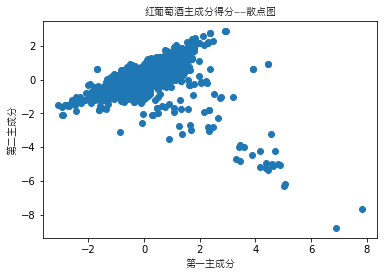

In [17]:
"""主成分得分散点图"""
pca_draw(pr)

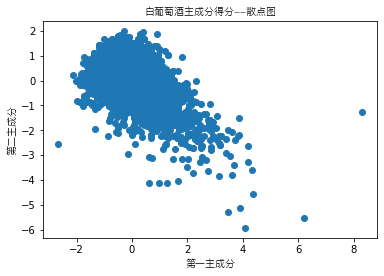

In [18]:
pca_draw(pw)